# Temat testów:
## Czy istnieje zależność w poprawności, trudności, czasie odpowiedzi dla trzech grup 1 vs 2 vs 3

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.tests.dependent_groups.more_than_two_groups import friedman_test

In [6]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

Poprawność

In [17]:
data = [df_answers['SumCorr_1'], df_answers['SumCorr_2'], df_answers['SumCorr_3']]

friedman_test(data)

Friedman statistic: 47.10498320268756
p-value: 0.17483422342263483
Brak podstaw do odrzucenia H0.


In [18]:
data = [df_answers['1a_corr'], df_answers['2a_corr'], df_answers['3a_corr']]

friedman_test(data)

Friedman statistic: 45.36383682469684
p-value: 0.22382844179081487
Brak podstaw do odrzucenia H0.


In [19]:
friedman_test([df_answers['1b_corr'], df_answers['2b_corr'], df_answers['3b_corr']])

Friedman statistic: 40.79418886198545
p-value: 0.3915006666464741
Brak podstaw do odrzucenia H0.


Brak istotnych różnic statystycznych w poprawności dla trzech grup.

Trudność zadania

In [20]:
friedman_test([df_answers['SumTrud_1'], df_answers['SumTrud_2'], df_answers['SumTrud_3']])

Friedman statistic: 47.87302261733561
p-value: 0.15589571736352348
Brak podstaw do odrzucenia H0.


In [21]:
friedman_test([df_answers['1a_trud'], df_answers['2a_trud'], df_answers['3a_trud']])

Friedman statistic: 30.104844467108617
p-value: 0.8458469393578772
Brak podstaw do odrzucenia H0.


In [22]:
friedman_test([df_answers['1b_trud'], df_answers['2b_trud'], df_answers['3b_trud']])

Friedman statistic: 60.11438203809257
p-value: 0.01651699577964757
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
          0         1        2
0  1.000000  0.342925  0.00100
1  0.342925  1.000000  0.00188
2  0.001000  0.001880  1.00000


Istnieje istotna statystycznie zależność w ocenie trudności zadania dla grafik b. (zwiazek: 1b z 3b; 2b z 3b)

Czas odpowiedzi

Friedman statistic: 63.61463414634147
p-value: 0.007667075298220019
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
          0         1         2
0  1.000000  0.173535  0.085049
1  0.173535  1.000000  0.001000
2  0.085049  0.001000  1.000000


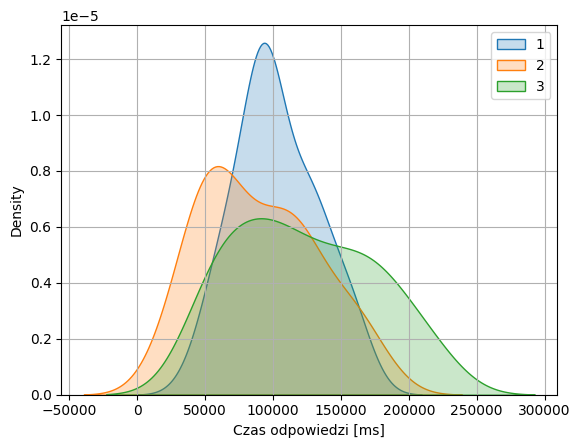

In [33]:
data = [df_time['SumTime_1'], df_time['SumTime_2'], df_time['SumTime_3']]
friedman_test(data)

for d in data:
    sns.kdeplot(d, fill=True)
plt.legend(['1', '2', '3'])
plt.xlabel('Czas odpowiedzi [ms]')
plt.grid(True)
plt.show()

Friedman statistic: 45.0
p-value: 0.23514400387861648
Brak podstaw do odrzucenia H0.


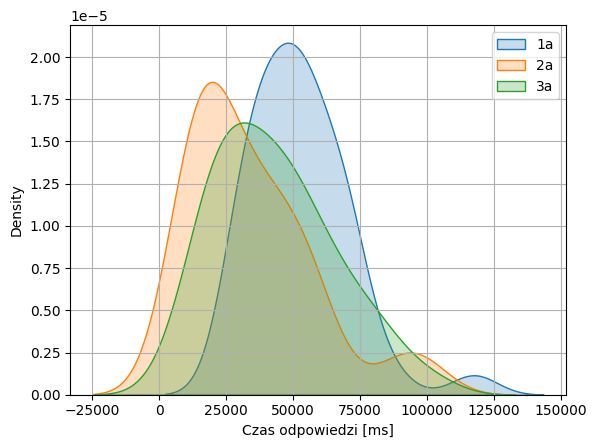

In [35]:
data = [df_time['Duration_1a'], df_time['Duration_2a'], df_time['Duration_3a']]
friedman_test(data)

for d in data:
    sns.kdeplot(d, fill=True)
plt.legend(['1a', '2a', '3a'])
plt.xlabel('Czas odpowiedzi [ms]')
plt.grid(True)
plt.show()

Friedman statistic: 71.23271521936273
p-value: 0.0012323438091164831
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
       0      1      2
0  1.000  0.900  0.001
1  0.900  1.000  0.001
2  0.001  0.001  1.000


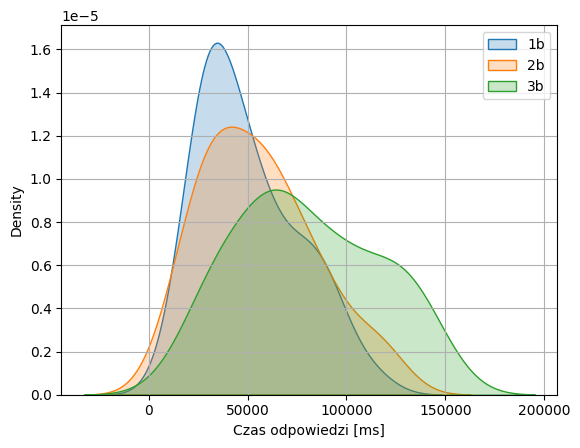

In [36]:
data = [df_time['Duration_1b'], df_time['Duration_2b'], df_time['Duration_3b']]
friedman_test(data)

for d in data:
    sns.kdeplot(d, fill=True)
plt.legend(['1b', '2b', '3b'])
plt.xlabel('Czas odpowiedzi [ms]')
plt.grid(True)
plt.show()

Istnieje istotna statystycznie zależność w czasie odpowiedzi dla trzech grafik dla:
- zsumowanych wartości (między grafikami 2 a 3 --> 3 dłuższy czas odpowiedzi)
- grafik b (między grafikami 1 a 3, 2 a 3; --> 3 dłuższy czas odpowiedzi w obu przypadkach) --> FAJNY WYKRES DO WYKORZYSTANIA

In [ ]:
# Export tabeli do wykresu poprawne vs. niepoprawne odpowiedzi per grafika
df_corr = pd.DataFrame(
    [df_answers['1a_corr'].value_counts(), df_answers['1b_corr'].value_counts(), df_answers['2a_corr'].value_counts(), df_answers['2b_corr'].value_counts(), df_answers['3a_corr'].value_counts(), df_answers['3b_corr'].value_counts(),
     ]
).rename(columns={1:'poprawna', 0: 'niepoprawna'})

df_corr

In [ ]:
df_corr.to_csv('../plots/poprawnosc_count.csv')